In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from keras.utils.vis_utils import plot_model
from keras.models import load_model
import modules.deep_model as DeepModel
import modules.model as Model 
import tensorflow as tf
import warnings
import numpy as np
import os

warnings.filterwarnings('ignore')

# Giới thiệu về LSTM Model (ghi dùm)

In [3]:
X_train, y_train = Model.loadData("./data/data/train")
X_train = X_train.fillna("")

X_test, y_test = Model.loadData("./data/data/test")
X_test = X_test.fillna("")

display(X_train, y_train)
display(X_test, y_test)


,raw_comment,normalize_comment,emoji_decode
0,form k đẹp lắm,form không đẹp lắm,
1,Áo Rộng thật sự\nGl nhanh\nChật lươ...,áo rộng thật sự nhanh chật lượng v...,
2,Màu túi hơi tối do với ảnh chụp,màu túi hơi tối do ảnh chụp,
3,Chất liệu vải k ổn lắm,chất liệu vải không ổn lắm,
4,"Mã ""màu đen"" hiện lên áo màu đen, còn ...",mã màu đen hiện lên áo màu đen còn mã...,
...,...,...,...
11359,"Khi bán combo ghi 3 đôi, nhưng nhận chỉ ...",bán combo ghi đôi nhưng nhận chỉ đôi ta...,
11360,"Áo đẹp, from chuẩn. Sẽ ủng hộ tiếp ạ !",áo đẹp from chuẩn sẽ ủng hộ tiếp,
11361,Đặt màu trắng kem thì giao màu xanh đen...,đặt màu trắng kem giao màu xanh đen giao...,expressionless
11362,Đồ chơi tí hon.\nShop nên dừng bán sp ...,đồ chơi tí hon nên dừng bán sản phẩ...,


,label
0,0
1,1
2,0
3,0
4,0
...,...
11359,0
11360,1
11361,0
11362,0


,raw_comment,normalize_comment,emoji_decode
0,Shop bán hàng kỉ quấn đầy đủ. Chất l...,bán hàng kỉ quấn đầy đủ chất lượn...,
1,"Đặt xl, áo ghi xl nhưng lại bé tí tẹo ...",đặt xl áo ghi xl nhưng bé tí tẹo ngang ...,
2,Kẹp rất rất đẹp săn được giá sale h...,kẹp rất rất đẹp săn được giá sale h...,
3,K nghĩ áo đẹp vậy đâu giao hàng nhanh k...,không nghĩ áo đẹp giao hàng nhanh không ...,
4,Hôm nay mới nhận đc nhưng nhìn qua thâ...,hôm nay mới nhận được nhưng nhìn qua...,
...,...,...,...
2837,Mình đặt 2 dây buộc tóc nhưng lại chi...,đặt dây buộc tóc nhưng chỉ nhận đưo...,star slightly_smiling_face slightly_smiling_fa...
2838,"Chất vải đẹp, có vẻ mát, giao hàng nha...",chất vải đẹp có vẻ mát giao hàng nhanh...,
2839,Dây nhìn tạm. K đẹp. Mắc sai dây mình ...,dây nhìn tạm không đẹp mắc sai dây pha...,
2840,Quần đẹp chất lượng ok nhưng chữ ru...,quần đẹp chất lượng ok nhưng chữ cu...,


,label
0,1
1,0
2,1
3,1
4,1
...,...
2837,0
2838,1
2839,0
2840,1


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 79)           283215    
_________________________________________________________________
lstm (LSTM)                  (None, 10)                3600      
_________________________________________________________________
output (Dense)               (None, 2)                 22        
Total params: 286,837
Trainable params: 286,837
Non-trainable params: 0
_________________________________________________________________


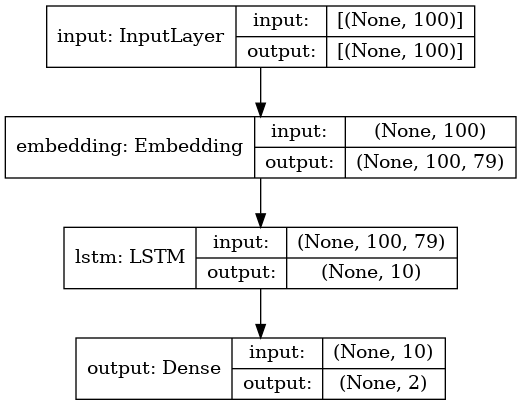

In [4]:
hyperparameters_1 = {
    'pX': X_train['normalize_comment'], 
    'py': y_train, 
    'pnum_words': None, 
    'pseq_length': None,
    'pno_units': 10, 
    'pdropout': 0.2, 
    'pbatch_size': 32, 
    'pepochs': 10, 
    'psave_weights': './models/lstm_model_comments_1.h5'
}

model_1 = DeepModel.SentimentLSTM()
model_1.define(**hyperparameters_1)
model_1.model.summary()
plot_model(model_1.model, to_file='./images/lstm_model_comments_1.png', show_shapes=True, show_layer_names=True)

In [5]:
model_1.fit(**hyperparameters_1)

Epoch 1/10
320/320 [==============================] - 16s 43ms/step - loss: 0.4491 - accuracy: 0.8274 - val_loss: 0.3615 - val_accuracy: 0.8531
Epoch 2/10
320/320 [==============================] - 13s 42ms/step - loss: 0.2841 - accuracy: 0.8928 - val_loss: 0.3337 - val_accuracy: 0.8584
Epoch 3/10
320/320 [==============================] - 13s 42ms/step - loss: 0.2386 - accuracy: 0.9145 - val_loss: 0.3364 - val_accuracy: 0.8602
Epoch 4/10
320/320 [==============================] - 13s 41ms/step - loss: 0.2112 - accuracy: 0.9238 - val_loss: 0.3382 - val_accuracy: 0.8690
Epoch 5/10
320/320 [==============================] - 14s 43ms/step - loss: 0.1939 - accuracy: 0.9322 - val_loss: 0.3514 - val_accuracy: 0.8628
Epoch 6/10
320/320 [==============================] - 13s 41ms/step - loss: 0.1811 - accuracy: 0.9370 - val_loss: 0.3685 - val_accuracy: 0.8593
Epoch 7/10
320/320 [==============================] - 13s 41ms/step - loss: 0.1657 - accuracy: 0.9412 - val_loss: 0.3900 - val_accuracy:

In [6]:
!tensorboard --logdir ./tb_log_sentiment --port 6006

2021-10-29 19:16:21.438342: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib/cuda/include:/usr/lib/cuda/lib64:
2021-10-29 19:16:21.438362: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2021-10-29 19:16:22.207586: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-29 19:16:22.207997: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib/cuda/include:/usr/lib/cuda/lib64:
2021-10-29 19:16:22.208057: W tensorflow

> **Nhận xét**:
> * Đây là line chart trên accuracy và loss do TensorBoard vẽ ra, với màu xanh là của validation data và cam là training data.
> * Ta thấy kể từ sau epoch đầu tiên thì giữa validation và train bắt đầu có sự khác biệt, chứng tỏ model đang bị overfitting.

Tiếp theo, ta sẽ tokenizer cho test data để tiến hành đánh giá trên test data.

In [7]:
prediction_1 = model_1.predict(X_test['normalize_comment'])
prediction_1

,input,output_proba,output_class
0,bán hàng kỉ quấn đầy đủ chất lượn...,"(3.5906758e-06, 0.9999964)",1
1,đặt xl áo ghi xl nhưng bé tí tẹo ngang ...,"(0.99944335, 0.00055663084)",0
2,kẹp rất rất đẹp săn được giá sale h...,"(0.038689945, 0.9613101)",1
3,không nghĩ áo đẹp giao hàng nhanh không ...,"(0.24827994, 0.7517201)",1
4,hôm nay mới nhận được nhưng nhìn qua...,"(0.9999081, 9.191086e-05)",0
...,...,...,...
2837,đặt dây buộc tóc nhưng chỉ nhận đưo...,"(0.999959, 4.1027197e-05)",0
2838,chất vải đẹp có vẻ mát giao hàng nhanh...,"(0.0013108798, 0.9986891)",1
2839,dây nhìn tạm không đẹp mắc sai dây pha...,"(0.9999777, 2.224039e-05)",0
2840,quần đẹp chất lượng ok nhưng chữ cu...,"(0.9782844, 0.02171559)",0


              precision    recall  f1-score   support

    Negative       0.85      0.87      0.86      1410
    Positive       0.87      0.85      0.86      1432

    accuracy                           0.86      2842
   macro avg       0.86      0.86      0.86      2842
weighted avg       0.86      0.86      0.86      2842



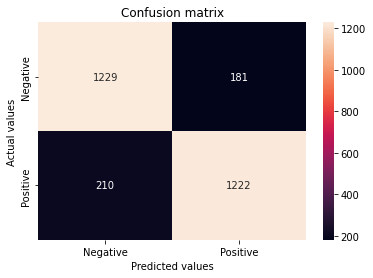

In [8]:
Model.confusionMatrix(y_test, prediction_1['output_class'])

Do ta có áp dụng checkpoint trong model để lưu lại các bộ tham số tốt nhất trong quá trình training, ta có thể lấy bộ tham số mà có validation loss thấp nhất để update trọng số cho model.

In [9]:
model_uw_1 = DeepModel.SentimentLSTM()
model_uw_1.define(**hyperparameters_1)
model_uw_1.model.load_weights("./models/lstm_model_comments_1/weights/02-0.333662.h5")

In [10]:
prediction_uw_1 = model_uw_1.predict(X_test['normalize_comment'])
prediction_uw_1

,input,output_proba,output_class
0,bán hàng kỉ quấn đầy đủ chất lượn...,"(0.0006533054, 0.9993467)",1
1,đặt xl áo ghi xl nhưng bé tí tẹo ngang ...,"(0.9957633, 0.0042366497)",0
2,kẹp rất rất đẹp săn được giá sale h...,"(0.62996817, 0.3700319)",0
3,không nghĩ áo đẹp giao hàng nhanh không ...,"(0.0758132, 0.9241868)",1
4,hôm nay mới nhận được nhưng nhìn qua...,"(0.955292, 0.044708073)",0
...,...,...,...
2837,đặt dây buộc tóc nhưng chỉ nhận đưo...,"(0.99549145, 0.0045085317)",0
2838,chất vải đẹp có vẻ mát giao hàng nhanh...,"(0.039107334, 0.9608926)",1
2839,dây nhìn tạm không đẹp mắc sai dây pha...,"(0.9962132, 0.0037868137)",0
2840,quần đẹp chất lượng ok nhưng chữ cu...,"(0.946519, 0.053480975)",0


              precision    recall  f1-score   support

    Negative       0.84      0.91      0.88      1410
    Positive       0.90      0.83      0.87      1432

    accuracy                           0.87      2842
   macro avg       0.87      0.87      0.87      2842
weighted avg       0.87      0.87      0.87      2842



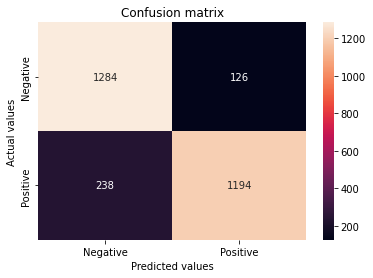

In [11]:
Model.confusionMatrix(y_test, prediction_uw_1['output_class'])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 100)          358500    
_________________________________________________________________
lstm (LSTM)                  (None, 15)                6960      
_________________________________________________________________
output (Dense)               (None, 2)                 32        
Total params: 365,492
Trainable params: 365,492
Non-trainable params: 0
_________________________________________________________________


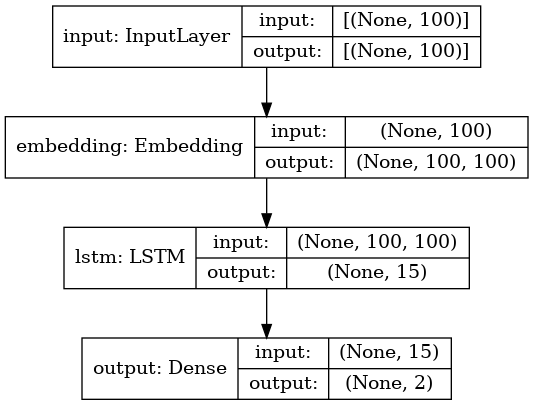

In [12]:
hyperparameters_2 = {
    'pX': X_train['normalize_comment'], 
    'py': y_train, 
    'pnum_words': 3000, 
    'pseq_length': 100,
    'pno_units': 15, 
    'pdropout': 0.3, 
    'pbatch_size': 32, 
    'pepochs': 10, 
    'psave_weights': './models/lstm_model_comments_2.h5'
}

model_2 = DeepModel.SentimentLSTM()
model_2.define(**hyperparameters_2)
model_2.model.summary()
plot_model(model_2.model, to_file='./images/lstm_model_comments_2.png', show_shapes=True, show_layer_names=True)

In [13]:
model_2.fit(**hyperparameters_2)

Epoch 1/10
320/320 [==============================] - 20s 55ms/step - loss: 0.4356 - accuracy: 0.8260 - val_loss: 0.3478 - val_accuracy: 0.8619
Epoch 2/10
320/320 [==============================] - 17s 54ms/step - loss: 0.2830 - accuracy: 0.8921 - val_loss: 0.3429 - val_accuracy: 0.8610
Epoch 3/10
320/320 [==============================] - 17s 53ms/step - loss: 0.2426 - accuracy: 0.9097 - val_loss: 0.3373 - val_accuracy: 0.8707
Epoch 4/10
320/320 [==============================] - 17s 53ms/step - loss: 0.2156 - accuracy: 0.9217 - val_loss: 0.3444 - val_accuracy: 0.8637
Epoch 5/10
320/320 [==============================] - 17s 53ms/step - loss: 0.1990 - accuracy: 0.9260 - val_loss: 0.3484 - val_accuracy: 0.8619
Epoch 6/10
320/320 [==============================] - 17s 53ms/step - loss: 0.1790 - accuracy: 0.9352 - val_loss: 0.3938 - val_accuracy: 0.8575
Epoch 7/10
320/320 [==============================] - 17s 54ms/step - loss: 0.1695 - accuracy: 0.9393 - val_loss: 0.3672 - val_accuracy:

In [14]:
prediction_2 = model_2.predict(X_test['normalize_comment'])
prediction_2

,input,output_proba,output_class
0,bán hàng kỉ quấn đầy đủ chất lượn...,"(4.6787076e-07, 0.9999995)",1
1,đặt xl áo ghi xl nhưng bé tí tẹo ngang ...,"(0.98676026, 0.013239731)",0
2,kẹp rất rất đẹp săn được giá sale h...,"(0.00014912886, 0.99985087)",1
3,không nghĩ áo đẹp giao hàng nhanh không ...,"(0.13313572, 0.8668643)",1
4,hôm nay mới nhận được nhưng nhìn qua...,"(0.99991465, 8.5295644e-05)",0
...,...,...,...
2837,đặt dây buộc tóc nhưng chỉ nhận đưo...,"(0.99998784, 1.2171718e-05)",0
2838,chất vải đẹp có vẻ mát giao hàng nhanh...,"(5.0273095e-05, 0.9999497)",1
2839,dây nhìn tạm không đẹp mắc sai dây pha...,"(0.99998283, 1.7156997e-05)",0
2840,quần đẹp chất lượng ok nhưng chữ cu...,"(0.9926151, 0.007384893)",0


              precision    recall  f1-score   support

    Negative       0.85      0.87      0.86      1410
    Positive       0.87      0.85      0.86      1432

    accuracy                           0.86      2842
   macro avg       0.86      0.86      0.86      2842
weighted avg       0.86      0.86      0.86      2842



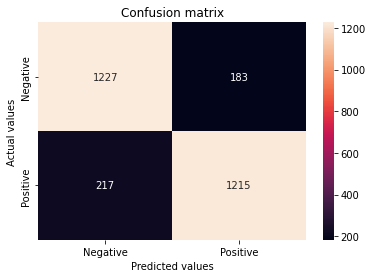

In [15]:
Model.confusionMatrix(y_test, prediction_2['output_class'])

In [16]:
def get_params():
    pbatch_size = np.random.choice(np.arange(5, 100, 10))
    pnum_words = np.random.choice(np.arange(2000, 3000, 10))
    optimizers = np.random.choice(['rmsprop', 'adam', 'adadelta'])
    pdropout = np.random.choice(np.linspace(0.1, 0.5, 10))
    pno_units = np.random.choice(np.arange(10, 50, 10))
    pseq_length = np.random.choice(np.arange(50, 200, 10))
    
    return {
        'pX': X_train['normalize_comment'], 
        'py': y_train, 
        'pnum_words': pnum_words, 
        'pseq_length': pseq_length,
        'pno_units': pno_units, 
        'pdropout': pdropout, 
        'poptimizers': optimizers,
        'pbatch_size': pbatch_size, 
        'pepochs': 10, 
        'psave_weights': './models/lstm_model_comments_3.h5'
    }

In [17]:
def try_params(**kwargs):
    model = DeepModel.SentimentLSTM()
    model.define(**kwargs)
    model.fit(**kwargs)

    return {"loss": model.evaluation()}

In [18]:
hb = DeepModel.Hyperband(get_params, try_params)
results = hb.run()

print(results)


*** 81 configurations x 1.0 iterations each

1 | Fri Oct 29 19:23:14 2021 | lowest loss so far: inf (run -1)

Epoch 1/10


Chúng ta hoàn toàn có thể tối ưu hóa cho các HYper Parameter, nhưng nhìn chung rất có thể lỗi hiện tại của chúng ta là **variance error**, tức lỗi từ dữ liệu chứ không phải **bias error**.

Điều nữa là việc tối ưu hóa tham số cho một Deep Neural Network là rất tốn công sức, nhưng nhóm vẫn muốn trình bày một kĩ thuật là HyperBand, đây là bài báo của tác giả [https://arxiv.org/pdf/1603.06560.pdf](https://arxiv.org/pdf/1603.06560.pdf). Ý tưởng chính của phương pháp này là với $n$ HyperParameters set ban đầu được lấy từ GridSearch gồm $m$ hyperparameters set ($n < m$) do ta định nghĩa. Ta sẽ tiến hành train và đánh giá bằng một vài phép toán, qua các lần đào tạo trên từng model, ta chọn ra các model có hiệu suất tốt nhất và loại bỏ các model có performance thấp hơn (nhờ các phép toán thống kê và xác suất). Tiếp theo, người ta tiến hành cải thiện weight trên các model còn sót lại. Cứ như thế số model còn tồn tại sau cùng của quá trình là các model tốt nhất. Tuy nhiên nếu data của ta không tốt thì khi áp dụng phương pháp này sẽ gây ra overfitting.

Đây là một model phân lớp dữ liệu MNIST có sử dụng phương pháp hyperband này để tối ưu hóa tham số, và với một tập dữ liệu đẹp như MNIST thì phương pháp này cực kì ổn. [https://github.com/PacktPublishing/Deep-Learning-Quick-Reference/tree/master/Chapter06](https://github.com/PacktPublishing/Deep-Learning-Quick-Reference/tree/master/Chapter06)

In [33]:
lstm_model_final = DeepModel.SentimentLSTM(lstm_model_uw, tokenizer)

In [37]:
tmp = lstm_model_final.predict(X_test_comments)

In [38]:
tmp

,input,output_proba,output_class
0,bán hàng kỉ quấn đầy đủ chất lượng ok đồ chuẩn...,"(0.0009966072, 0.99900347)",1
1,đặt xl áo ghi xl nhưng bé tí tẹo ngang size mì...,"(0.99316263, 0.0068374383)",0
2,kẹp rất rất đẹp săn được giá sale hôm chỉ giá ...,"(0.5307486, 0.46925136)",0
3,không nghĩ áo đẹp giao hàng nhanh không bình t...,"(0.02204431, 0.97795576)",1
4,hôm nay mới nhận được nhưng nhìn qua thấy cũng...,"(0.8622492, 0.1377508)",0
...,...,...,...
2837,đặt dây buộc tóc nhưng chỉ nhận được cái nhắn ...,"(0.9942146, 0.0057854448)",0
2838,chất vải đẹp có vẻ mát giao hàng nhanh chóng đ...,"(0.028606944, 0.971393)",1
2839,dây nhìn tạm không đẹp mắc sai dây phải ngồi c...,"(0.99471915, 0.005280828)",0
2840,quần đẹp chất lượng ok nhưng chữ của quần màu ...,"(0.6221042, 0.37789577)",0


In [43]:
Model.saveByPickle(tokenizer, "./models/lstm_model_tokenizer.pickle")

<keras_preprocessing.text.Tokenizer object at 0x7fef2ca08df0> has been saved at ./models/lstm_model_tokenizer.pickle.


In [45]:
lstm_model_uw.save("./models/lstm_model_comments.h5")

In [23]:
import numpy as np

In [25]:
np.arange(5, 100, 10)

array([ 5, 15, 25, 35, 45, 55, 65, 75, 85, 95])